In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
df = pd.read_csv(r'C:\Users\aditi\Downloads\startup_funding.csv')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
2368,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
2369,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
2370,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [3]:
df.shape

(2372, 10)

In [4]:
df.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [6]:
df.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object

In [7]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

### Problem 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [8]:
test1 = df.copy()

In [9]:
#filtering na
test1.dropna(inplace = True, subset = ['CityLocation'])
test1.reset_index(drop = True, inplace = True)

In [10]:
#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

In [11]:
#replacing the wrong written city
test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

test1

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2188,2196,29-04-2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"35,00,000",Series A
2189,2197,29-04-2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2190,2198,29-04-2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"4,00,000",NaN
2191,2199,29-04-2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"5,00,000",NaN


In [12]:
#filtering city
test1['CityLocation'] = test1['CityLocation'].apply(ind_city)
test1['CityLocation'] 

0       Bangalore
1          Mumbai
2       New Delhi
3          Mumbai
4       Hyderabad
          ...    
2188    Bangalore
2189    Bangalore
2190    Bangalore
2191      Chennai
2192        Noida
Name: CityLocation, Length: 2193, dtype: object

In [13]:
#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]
test1

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
5,5,01-07-2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"10,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2186,2194,29-04-2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,"10,00,000",NaN
2188,2196,29-04-2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"35,00,000",Series A
2189,2197,29-04-2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2190,2198,29-04-2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"4,00,000",NaN


In [14]:
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
No_Of_Funding = temp.values
#build pandas dataframe for the city and corresponding investments
li = list(zip(city, No_Of_Funding))
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
freq

,Name Of City,Number Of Fundings
0,Bangalore,636
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


In [15]:
#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


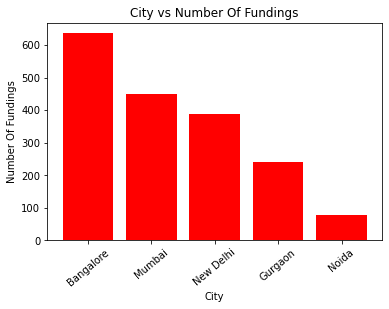

In [16]:
#bar Graph
plt.bar(city, No_Of_Funding, color = ['Red'], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()




### Problem 2


Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [17]:
test2 = df.copy()

In [18]:
#correcting the spelling in investors name ignoring undisclosed investors
test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors","",inplace = True)
test2['InvestorsName']

0                                             Kae Capital
1                              Triton Investment Advisors
2       Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3       Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                          Narottam Thudi, Shireesh Palle
                              ...                        
2367                          Asia Pacific Internet Group
2368                                       KARSEMVEN Fund
2369                       Exfinity Fund, GrowX Ventures.
2370                                           MakeMyTrip
2371                    UK based Group of Angel Investors
Name: InvestorsName, Length: 2372, dtype: object

In [19]:
#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

In [20]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d

In [21]:
dictionary = build_dict(test2['InvestorsName'])
# dictionary
#build pandas dataframe of investors name and its number of investments
invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))
invest

,0
Kae Capital,22
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1
...,...
Asia Pacific Internet Group,1
KARSEMVEN Fund,1
Exfinity Fund,1
GrowX Ventures.,1


In [22]:
#sort the values in descending order 
invest = invest.sort_values(by = [0], ascending = False)
invest

,0
Sequoia Capital,64
Accel Partners,53
Kalaari Capital,44
SAIF Partners,41
Indian Angel Network,40
...,...
Salesforce Ventures,1
Microsoft Ventures,1
Fenqile,1
Yeahmobi,1


In [23]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i])

In [24]:
#printing the top investors
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1


List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. SAIF Partners
5. Indian Angel Network


In [25]:
#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,[64]
1,Accel Partners,[53]
2,Kalaari Capital,[44]
3,SAIF Partners,[41]
4,Indian Angel Network,[40]


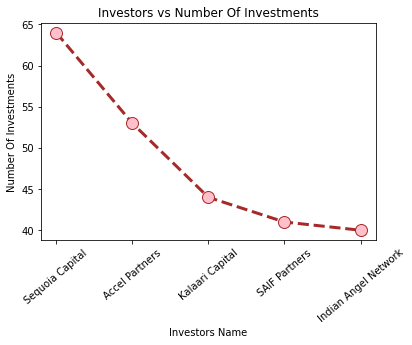

In [26]:
#plot the plot line
plt.plot(x, y, color='brown', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='pink', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()


### Problem 3


After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [27]:
test3 = df.copy()

In [28]:
#correcting the spelling in investors name ignoring undisclosed investors
test3['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test3['InvestorsName'].replace("Undisclosed Investors","",inplace = True)
test3['InvestorsName']

0                                             Kae Capital
1                              Triton Investment Advisors
2       Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3       Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                          Narottam Thudi, Shireesh Palle
                              ...                        
2367                          Asia Pacific Internet Group
2368                                       KARSEMVEN Fund
2369                       Exfinity Fund, GrowX Ventures.
2370                                           MakeMyTrip
2371                    UK based Group of Angel Investors
Name: InvestorsName, Length: 2372, dtype: object

In [29]:
#correcting major startup names
test3['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test3['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test3['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test3['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Olacabs", "Ola", inplace = True)
test3['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test3['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)
test3['StartupName']

0               TouchKin
1                Ethinos
2           Leverage Edu
3                   Zepo
4           Click2Clinic
              ...       
2367          Printvenue
2368            Graphene
2369      Mad Street Den
2370           Simplotel
2371    couponmachine.in
Name: StartupName, Length: 2372, dtype: object

In [30]:
test3.dropna(inplace = True, subset = ["InvestorsName", "StartupName"])
test3.reset_index(drop = True, inplace = True)

In [31]:
#function to create dictionary of investor name making investment to different startups
def Create(startup_name, Investor_name):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None: #no startup is still funded by this investor
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]
            
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:  #no startup is still funded by this investor
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:         #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [32]:
#making dictionary
dictionary = Create(test3['StartupName'], test3['InvestorsName'])
dictionary

{'Kae Capital': 20,
 'Triton Investment Advisors': 1,
 'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 17,
 'LetsVenture': 17,
 'Anupam Mittal': 18,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Infuse Ventures': 8,
 'JLL': 2,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 41,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 47,
 'Jungle Ventures': 11,
 'Shailesh Rao': 1,
 'Venture Highway': 3,
 'BCCL': 1,
 'Blume Ventures': 36,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 4,
 'Ashish Gupta': 5,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 18,
 'Shunwei Capital': 3,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Mitsu

In [33]:
#build pandas dataframe
dict_invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))
dict_invest

,0
Kae Capital,20
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1
...,...
Asia Pacific Internet Group,1
KARSEMVEN Fund,1
Exfinity Fund,1
GrowX Ventures.,1


In [34]:
#sort in descending order on the basis of values
dict_invest = dict_invest.sort_values(by = [0], ascending = False)
dict_invest

,0
Sequoia Capital,48
Accel Partners,47
Kalaari Capital,41
Indian Angel Network,40
Blume Ventures,36
...,...
Krishnakumar Nataraj,1
Abhishek Agarwal,1
Green House Ventures Accelerator,1
Franklin Templeton International Services Pvt. Ltd,1


In [35]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times in different startups
for i in range(5):
    x.append(dict_invest.index[i])
    y.append(dict_invest.values[i][0])

In [36]:
#printing the top investors who invested who invested most number of times in different startups
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Indian Angel Network
5. Blume Ventures


In [37]:
#pandas frame for Investors name and corresponding Number of Investments made by them in different startups
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,48
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36


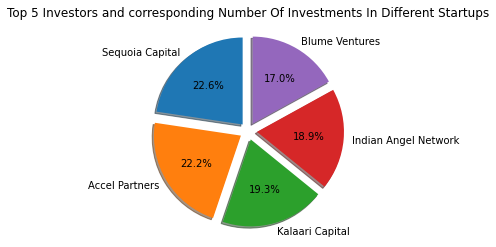

In [38]:
#plot
#pie-chart
plt.pie(y, labels = x,startangle=90, shadow = True, explode = (0.1, 0.1, 0.1, 0.1,0.1), autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()


### Problem 4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [39]:
test4 = df.copy()

In [40]:
#correcting the spelling in investors name as ignoring the undisclosed investors
test4['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test4['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

In [41]:
#correcting major startup names
test4['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test4['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test4['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test4['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Olacabs", "Ola", inplace = True)
test4['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test4['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [42]:
#correcting spelling of investment type
test4['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test4['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test4['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)
test4['InvestmentType']

0       Private Equity
1       Private Equity
2         Seed Funding
3         Seed Funding
4         Seed Funding
             ...      
2367    Private Equity
2368    Private Equity
2369    Private Equity
2370    Private Equity
2371      Seed Funding
Name: InvestmentType, Length: 2372, dtype: object

In [43]:
#filter na 
test4.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test4.reset_index(inplace = True, drop = True)

In [44]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]   
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [45]:
#making dictionary to keep record of every investor
dictionary = Create(test4['StartupName'], test4['InvestorsName'], test4['InvestmentType'], ["Crowd Funding", "Seed Funding"])
dictionary

{'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 14,
 'LetsVenture': 16,
 'Anupam Mittal': 16,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Blume Ventures': 10,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 3,
 'Ashish Gupta': 5,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 10,
 'Shunwei Capital': 1,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Venture Catalysts': 5,
 'Sourav Ganguly': 1,
 'Ankit Aditya': 1,
 'Moksh Sports Ventures': 1,
 'Fireside Ventures': 4,
 'Apurva Salarpuria': 1,
 'Sidharth Pansari': 2,
 'Sprout Capital': 1,
 '500 Startups': 11,
 'Purvi Capital': 2,
 'Rajan Anandan': 23,
 'Abhishek Gupta': 1,
 'Indian Angel Network': 33,
 'Brigade Innovations LLP': 1,
 'TV Mohandas Pai': 10,
 'Suhail Rahman

In [46]:
#build pandas dataframe
dict_invest_type = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))
dict_invest_type

,0
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1
Sadashiva NT,1
Arjun Mehta,1
...,...
Michael & Susan Dell Foundation,1
August Capital Partners,1
Michael Blakey,1
Inventus Capital Partners,1


In [47]:
#sort in descending order on the basis of values
dict_invest_type = dict_invest_type.sort_values(by = [0], ascending = False)
dict_invest_type

,0
Indian Angel Network,33
Rajan Anandan,23
LetsVenture,16
Anupam Mittal,16
Group of Angel Investors,14
...,...
Mohit Lalvani,1
Kamal Puri,1
Vineet Taneja,1
Rohit Chokhani,1


In [48]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(dict_invest_type.index[i])
    y.append(dict_invest_type.values[i][0])

In [49]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is either Seed funding or Crowd funding
print("List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :
1. Indian Angel Network
2. Rajan Anandan
3. LetsVenture
4. Anupam Mittal
5. Group of Angel Investors


In [50]:
#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Seed funding or Crowd funding"])
investor_data

,Name Of Investors,Total Number Of Investments of type Seed funding or Crowd funding
0,Indian Angel Network,33
1,Rajan Anandan,23
2,LetsVenture,16
3,Anupam Mittal,16
4,Group of Angel Investors,14


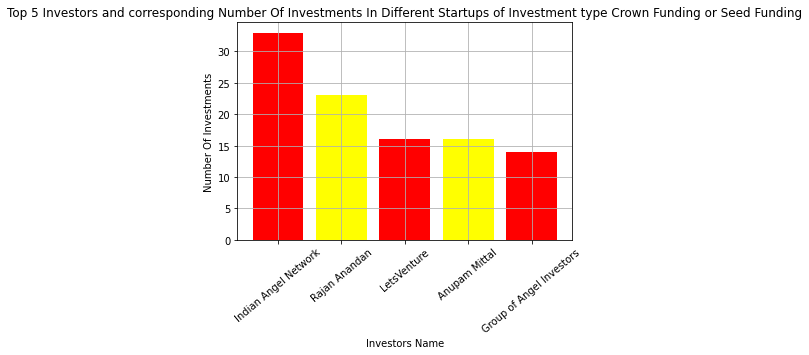

In [51]:
#plot
#bar-graph
plt.bar( x, y, color = ['red', 'yellow'])
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Crown Funding or Seed Funding")
plt.show()

### Problem 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [52]:
test5 = df.copy()

In [53]:
#correcting the spelling in investors name as ignoring the undisclosed investors
test5['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test5['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

In [54]:
#correcting major startup names
test5['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test5['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test5['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test5['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Olacabs", "Ola", inplace = True)
test5['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test5['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [55]:
#correcting spelling of investment type
test5['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test5['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test5['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

In [56]:
#filter na 
test5.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test5.reset_index(inplace = True, drop = True)

In [57]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]   
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [58]:
#making dictionary to keep record of every investor
dictionary = Create(test5['StartupName'], test5['InvestorsName'], test5['InvestmentType'], ["Private Equity"])
dictionary

{'Kae Capital': 10,
 'Triton Investment Advisors': 1,
 'Infuse Ventures': 6,
 'JLL': 1,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 35,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 43,
 'Jungle Ventures': 8,
 'Shailesh Rao': 1,
 'Venture Highway': 2,
 'BCCL': 1,
 'Mitsui & Co.': 2,
 'Dunamis Ventures Pte Ltd': 1,
 'SBI-FMO Fund': 1,
 'Bessemer Venture Partners': 11,
 'Catamaran Ventures': 2,
 'Corvus Ventures': 1,
 'MAPE Advisory Group': 1,
 'Blacksoil Capital Pvt. Ltd': 1,
 'IDG Ventures India Advisors': 1,
 'One97 Communication Ltd': 1,
 'ain Capital Ventures': 1,
 'Renaud Laplanche': 1,
 'Stellaris Venture Partners': 3,
 'Tencent Holdings': 3,
 'Goldman Sachs': 6,
 'HBM Healthcare Investments': 1,
 'Maverick Capital Ventures': 1,
 'Sequoia India': 14,
 'Omidyar Network and Kae Capital': 1,
 'Info Edge (India) Ltd': 6,
 'TVS Motor Company': 1,
 'Emerging India': 1,
 'blockchain e

In [59]:
#build pandas dataframe
dict_invest_type = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))
dict_invest_type

,0
Kae Capital,10
Triton Investment Advisors,1
Infuse Ventures,6
JLL,1
Asset Management (Asia) Ltd,1
...,...
People Group (Shaadi.com),1
Asia Pacific Internet Group,1
KARSEMVEN Fund,1
Exfinity Fund,1


In [60]:
#sort in descending order on the basis of values
dict_invest_type = dict_invest_type.sort_values(by = [0], ascending = False)
dict_invest_type 

,0
Sequoia Capital,45
Accel Partners,43
Kalaari Capital,35
Blume Ventures,27
SAIF Partners,24
...,...
BlackSoil Capital Pvt. Ltd.,1
Scadea Solutions Inc,1
Lightbox Ventures and others,1
Goldman Sachs Group,1


In [61]:
x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(dict_invest_type.index[i])
    y.append(dict_invest_type.values[i][0])

In [62]:
#printing the top investors who invested who invested most number of times in different startups and Investment type is Private Equity
print("List Of Top 5 Investors who Invested most number of times of type Private Equity:")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Private Equity:
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Blume Ventures
5. SAIF Partners


In [63]:
#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Private Equity"])
investor_data

,Name Of Investors,Total Number Of Investments of type Private Equity
0,Sequoia Capital,45
1,Accel Partners,43
2,Kalaari Capital,35
3,Blume Ventures,27
4,SAIF Partners,24


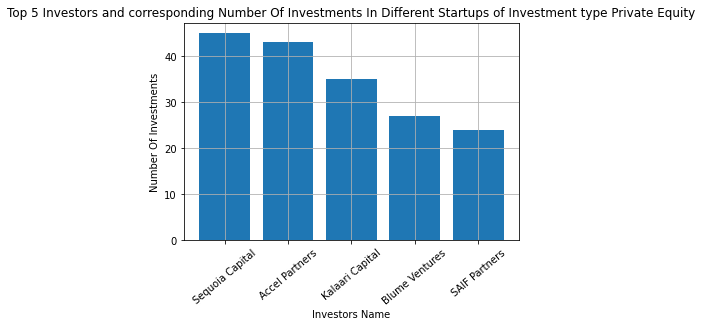

In [64]:
#plot
#bar plot
plt.bar(x, y)
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Private Equity")
plt.show()

###   Results from above 5 problems-:

#### 1.City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.
#### 2. List Of Top 5 Investors who Invested most number of times : Sequoia Capital, Accel Partners, Kalaari Capital, SAIF Partners and Indian Angel Network.

### Most Funded startup

In [65]:
# remove comma 
test5.AmountInUSD=test5.AmountInUSD.str.replace(',','')
test6=test5.copy()
test6

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN
...,...,...,...,...,...,...,...,...,...,...
2358,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN
2359,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund
2360,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN
2361,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [66]:
# drop nan values
test5.dropna(subset=['AmountInUSD'],inplace=True)
test5

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN
5,5,01-07-2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000,NaN
6,6,03-07-2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000,NaN
...,...,...,...,...,...,...,...,...,...,...
2357,2366,28-01-2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,2500000,Series A
2358,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN
2359,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund
2360,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN


In [71]:
# convert object into int
test6['AmountInUSD']=test5['AmountInUSD'].astype(str).astype(int)
test6

,AmountInUSD
StartupName,
FR8,NaN
BetterPlace,NaN
ShopsUp,NaN
Wizrocket,NaN
Nykaa,NaN
Johari Shop,NaN
IndustryBuying,NaN
practo,NaN
Revv,NaN


In [72]:
# to know amount value is in int or not
test6.dtypes

AmountInUSD    float64
dtype: object

In [73]:
# sort values
test6=test6.sort_values('AmountInUSD',ascending=False)
test6=test6[['StartupName','AmountInUSD']][:10]
test6.set_index('StartupName',drop=True,inplace=True)
test6

KeyError: "['StartupName'] not in index"

No handles with labels found to put in legend.


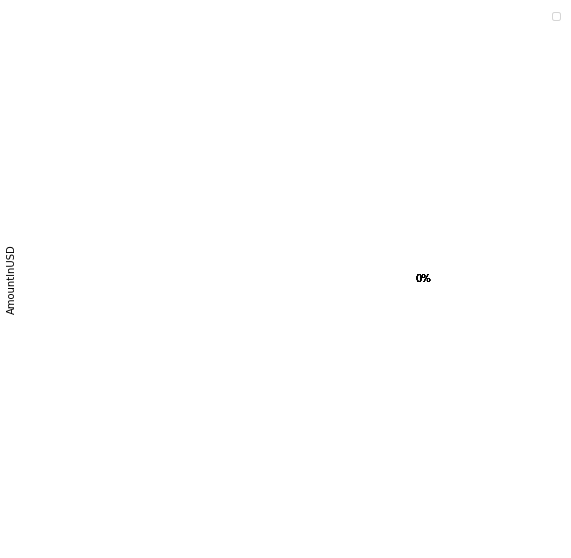

In [76]:
#plot
#pie-chart
test6.plot(kind="pie",subplots=True,counterclock=False,figsize=(10,10),autopct='%.f%%')
plt.show()